In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000890066"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000890066
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,GLEN BURNIE BANCORP
Ticker,GLBZ


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,8.0,1.210750e+01,2.131230e-01,11.83,1.192750e+01,12.125,1.226250e+01,12.38
interest income,28.0,4.205929e+06,2.065669e+06,3269000.00,3.441500e+06,3836000.000,4.138750e+06,14520000.00
net income,28.0,4.715714e+05,6.372423e+05,-2118000.00,3.305000e+05,498000.000,6.910000e+05,1914000.00
net interest income,28.0,3.352286e+06,1.702271e+06,2733000.00,2.932750e+06,3000500.000,3.156250e+06,11986000.00
provision for loan losses,28.0,1.946786e+05,2.462500e+05,-30000.00,0.000000e+00,114000.000,2.562500e+05,1021000.00


# Plots

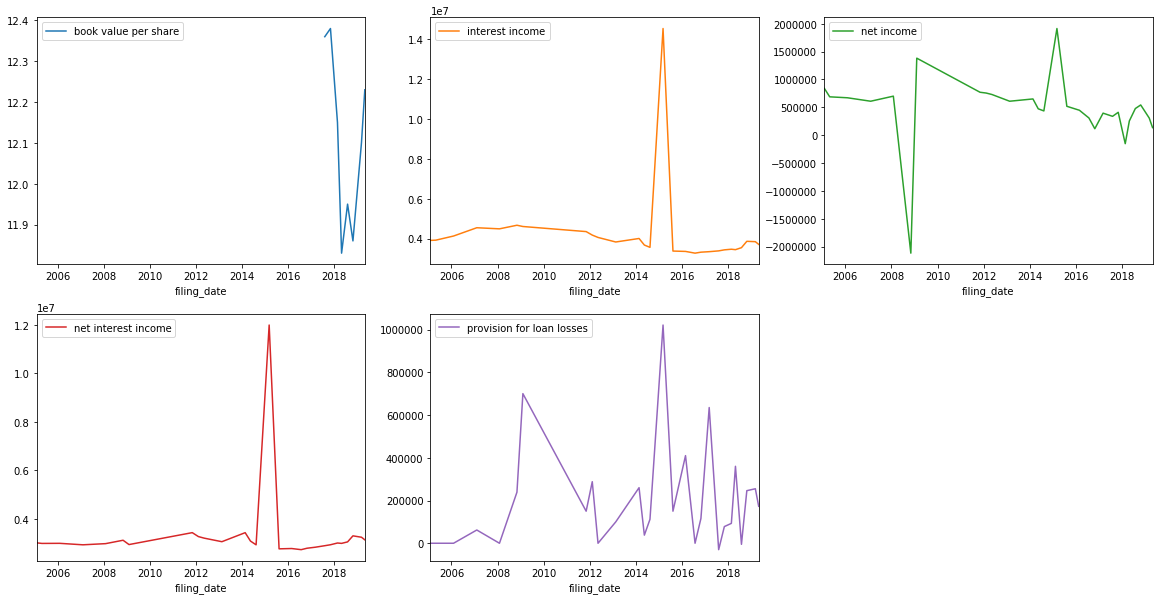

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                               
0000890066 book value per share       2004Q4 to 2017Q1: 50 periods  missing   
           interest income             2005Q2 to 2005Q3: 2 periods  missing   
           interest income             2006Q1 to 2006Q3: 3 periods  missing   
           interest income             2007Q1 to 2007Q3: 3 periods  missing   
           interest income             2008Q1 to 2008Q2: 2 periods  missing   
           interest income            2009Q1 to 2011Q2: 10 periods  missing   
           interest income             2012Q2 to 2012Q3: 2 periods  missing   
           interest income             2013Q1 to 2013Q3: 3 periods  missing   
           interest income                                  2014Q3  missing   
           interest income                                  2015Q1  missing   
           interest income                                  2015Q3  missing   
           interest income                                  2016Q1  missing   
           interest income                                  2017Q1  missing   
           net income                  2005Q2 to 2005Q3: 2 periods  missing   
           net income                  2006Q1 to 2006Q3: 3 periods  missing   
           net income                  2007Q1 to 2007Q3: 3 periods  missing   
           net income                  2008Q1 to 2008Q2: 2 periods  missing   
           net income                 2009Q1 to 2011Q2: 10 periods  missing   
           net income                  2012Q2 to 2012Q3: 2 periods  missing   
           net income                  2013Q1 to 2013Q3: 3 periods  missing   
           net income                                       2014Q3  missing   
           net income                                       2015Q1  missing   
           net income                                       2015Q3  missing   
           net income                                       2016Q1  missing   
           net income                                       2017Q1  missing   
           net interest income         2005Q2 to 2005Q3: 2 periods  missing   
           net interest income         2006Q1 to 2006Q3: 3 periods  missing   
           net interest income         2007Q1 to 2007Q3: 3 periods  missing   
           net interest income         2008Q1 to 2008Q2: 2 periods  missing   
           net interest income        2009Q1 to 2011Q2: 10 periods  missing   
           net interest income         2012Q2 to 2012Q3: 2 periods  missing   
           net interest income         2013Q1 to 2013Q3: 3 periods  missing   
           net interest income                              2014Q3  missing   
           net interest income                              2015Q1  missing   
           net interest income                              2015Q3  missing   
           net interest income                              2016Q1  missing   
           net interest income                              2017Q1  missing   
           provision for loan losses   2005Q2 to 2005Q3: 2 periods  missing   
           provision for loan losses   2006Q1 to 2006Q3: 3 periods  missing   
           provision for loan losses   2007Q1 to 2007Q3: 3 periods  missing   
           provision for loan losses   2008Q1 to 2008Q2: 2 periods  missing   
           provision for loan losses  2009Q1 to 2011Q2: 10 periods  missing   
           provision for loan losses   2012Q2 to 2012Q3: 2 periods  missing   
           provision for loan losses   2013Q1 to 2013Q3: 3 periods  missing   
           provision for loan losses                        2014Q3  missing   
           provision for loan losses                        2015Q1  missing   
           provision for loan losses                        2015Q3  missing   
           provision for loan losses                        2016Q1  missing   
           provision for loan losses                        2017Q1  missing   
           total revenue       

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()